In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stream_views_df = pd.read_csv("data/content_views_raw.csv", header=0)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME,ORGANIZATION
0,1019,3021,Best in Class,579,About HMD,2017-07-09 10:23:36,473,HMD,28
1,1054,3021,Best in Class,579,About HMD,2017-07-09 14:41:25,473,HMD,28
2,977,3021,Best in Class,579,About HMD,2017-07-09 13:35:38,473,HMD,28
3,1337,3021,Best in Class,579,About HMD,2017-07-10 05:53:05,473,HMD,28
4,1346,3021,Best in Class,579,About HMD,2017-07-10 11:23:59,473,HMD,28


In [3]:
stream_views_df = stream_views_df.drop(["CARDTITLE", "STREAMNAME", "ORGANIZATION", "MODULENAME"], axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,TIMESTAMP,MODULEID
0,1019,3021,579,2017-07-09 10:23:36,473
1,1054,3021,579,2017-07-09 14:41:25,473
2,977,3021,579,2017-07-09 13:35:38,473
3,1337,3021,579,2017-07-10 05:53:05,473
4,1346,3021,579,2017-07-10 11:23:59,473


In [4]:
stream_views_df["date"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[0].strip())
stream_views_df["time"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[1].strip())
stream_views_df = stream_views_df.drop("TIMESTAMP", axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,MODULEID,date,time
0,1019,3021,579,473,2017-07-09,10:23:36
1,1054,3021,579,473,2017-07-09,14:41:25
2,977,3021,579,473,2017-07-09,13:35:38
3,1337,3021,579,473,2017-07-10,05:53:05
4,1346,3021,579,473,2017-07-10,11:23:59


In [7]:
def concat_time(time_str):
    return int(time_str[:2]) * 100 + int(time_str[3:5])

stream_views_df["time_concatenated"] = stream_views_df["time"].apply(concat_time)

In [8]:
stream_views_df.head()

,USERID,CARDID,STREAMID,MODULEID,date,time,time_concatenated
0,1019,3021,579,473,2017-07-09,10:23:36,1023
1,1054,3021,579,473,2017-07-09,14:41:25,1441
2,977,3021,579,473,2017-07-09,13:35:38,1335
3,1337,3021,579,473,2017-07-10,05:53:05,553
4,1346,3021,579,473,2017-07-10,11:23:59,1123


In [10]:
def label_time(x):
    if x < 800:
        return "Early morning"
    elif x >= 800 and x < 1200:
        return "Morning"
    elif x >= 1200 and x < 1400:
        return "Noon"
    elif x >= 1400 and x < 1800:
        return "Afternoon"
    elif x >= 1800 and x < 2000:
        return "Evening"
    else:
        return "Night"
    
stream_views_df["time_labeled"] = stream_views_df["time_concatenated"].apply(label_time)  
stream_views_df.head()

,USERID,CARDID,STREAMID,MODULEID,date,time,time_concatenated,time_labeled
0,1019,3021,579,473,2017-07-09,10:23:36,1023,Morning
1,1054,3021,579,473,2017-07-09,14:41:25,1441,Afternoon
2,977,3021,579,473,2017-07-09,13:35:38,1335,Noon
3,1337,3021,579,473,2017-07-10,05:53:05,553,Early morning
4,1346,3021,579,473,2017-07-10,11:23:59,1123,Morning


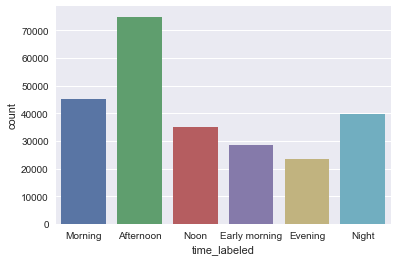

In [11]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="time_labeled", data=stream_views_df)